<a href="https://colab.research.google.com/github/kaleexand/DataScience-homework/blob/main/Totanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
df_train = pd.read_csv('train.csv')
print("Количество пассажиров")
df_train.groupby(["Sex"])["PassengerId"].count()


Количество пассажиров


Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [89]:
# df_train.describe()
print("Средний возраст:", df_train.Age.mean())

Средний возраст: 29.69911764705882


In [90]:
print("Средний возраст")
df_train.groupby(["Sex"])["Age"].mean()

Средний возраст


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [91]:
print("Средний возраст по классам")
df_train.groupby(["Pclass", "Sex"])["Age"].mean()

Средний возраст по классам


Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [92]:
print("Средний возраст по выживанию")

df_train.groupby(["Survived", "Sex"])["Age"].mean()

Средний возраст по выживанию


Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [93]:
print("Процент выживших")
df_train.groupby(["Sex"])["Survived"].mean()*100

Процент выживших


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [94]:
print("Процент выживших относительно каждого класса")
df_train.groupby(["Pclass"])["Survived"].mean()*100

Процент выживших относительно каждого класса


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Проверим гипотезу в какой степени **Pclass (класс)**  повлиял на то, выживет конкретный человек или нет.
Чем выше у пассажиров их социальное положение, тем выше их вероятность спасения

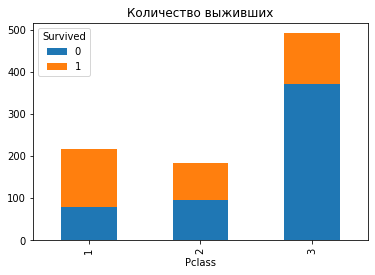

In [128]:
df_train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True, title='Количество выживших')

Проверим гипотезу в какой степени **Sex (пол)** и **Pclass (класс)**  повлияли на то, выживет конкретный человек или нет.

In [119]:
df_train.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True)*100

Pclass  Sex     Survived
1       female  1           96.808511
                0            3.191489
        male    0           63.114754
                1           36.885246
2       female  1           92.105263
                0            7.894737
        male    0           84.259259
                1           15.740741
3       female  0           50.000000
                1           50.000000
        male    0           86.455331
                1           13.544669
Name: Survived, dtype: float64

Рассмотрим по первому классу, **female** (женщина) и **Survived** выживет ли она - 1 или не выживет - 0.

Исходя из данных, если это была женщина из 1 класса, это практически 100% гарантия, что она выживет (0,968085). У мужчин из 1 класса иная статистика, можно предположить, что они спасали женщин, но можно увидеть, что выживаемость мужчин из 1 класса выше ( ~37%), чем у мужчин 2( ~16%) и 3( ~14%) классов.

Сравним женщин из всех классов. Оценка выживаемости женщин из 2 класса ~92%, из 3 класса хуже ~50%. 

Самая маленькая вероятность выживаемости около 14% была у мужчин из 3 класса. Из 100 мужчин 3 класса только 14 спасалось.
